# Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")


# Getting the data

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
df.shape

(908, 25)

# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [9]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

#### The Below columns will be deleted as it has Around 50% of null values

In [4]:
df.drop("other_fuel1",axis=1,inplace=True)
df.drop("other_fuel2",axis=1,inplace=True)
df.drop("other_fuel3",axis=1,inplace=True)
df.drop("wepp_id",axis=1,inplace=True)
df.drop("estimated_generation_gwh",axis=1,inplace=True)

In [5]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

#### filling the missing values with mean values of the respective columns

In [7]:
df["latitude"].fillna(df['latitude'].mean(),inplace=True)
df["longitude"].fillna(df['longitude'].mean(),inplace=True)
df["year_of_capacity_data"].fillna(2018.0,inplace=True)

In [8]:

df["commissioning_year"].fillna(2013.0,inplace=True)

In [9]:

df["owner"].fillna("Acc Acc ltd",inplace=True)

In [10]:
df["geolocation_source"].fillna("WRI",inplace=True)

In [11]:
df["generation_gwh_2013"].fillna(df['generation_gwh_2013'].mean(),inplace=True)
df["generation_gwh_2014"].fillna(df['generation_gwh_2014'].mean(),inplace=True)
df["generation_gwh_2015"].fillna(df['generation_gwh_2015'].mean(),inplace=True)
df["generation_gwh_2016"].fillna(df['generation_gwh_2016'].mean(),inplace=True)
df["generation_gwh_2017"].fillna(df['generation_gwh_2017'].mean(),inplace=True)

In [12]:
df["generation_data_source"].fillna("Central Electricity Authority",inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      908 non-null    float64
 9   owner                   908 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      908 non-null    object 
 13  year_of_capacity_data   908 non-null    float64
 14  generation_gwh_2013     908 non-null    fl

In [14]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

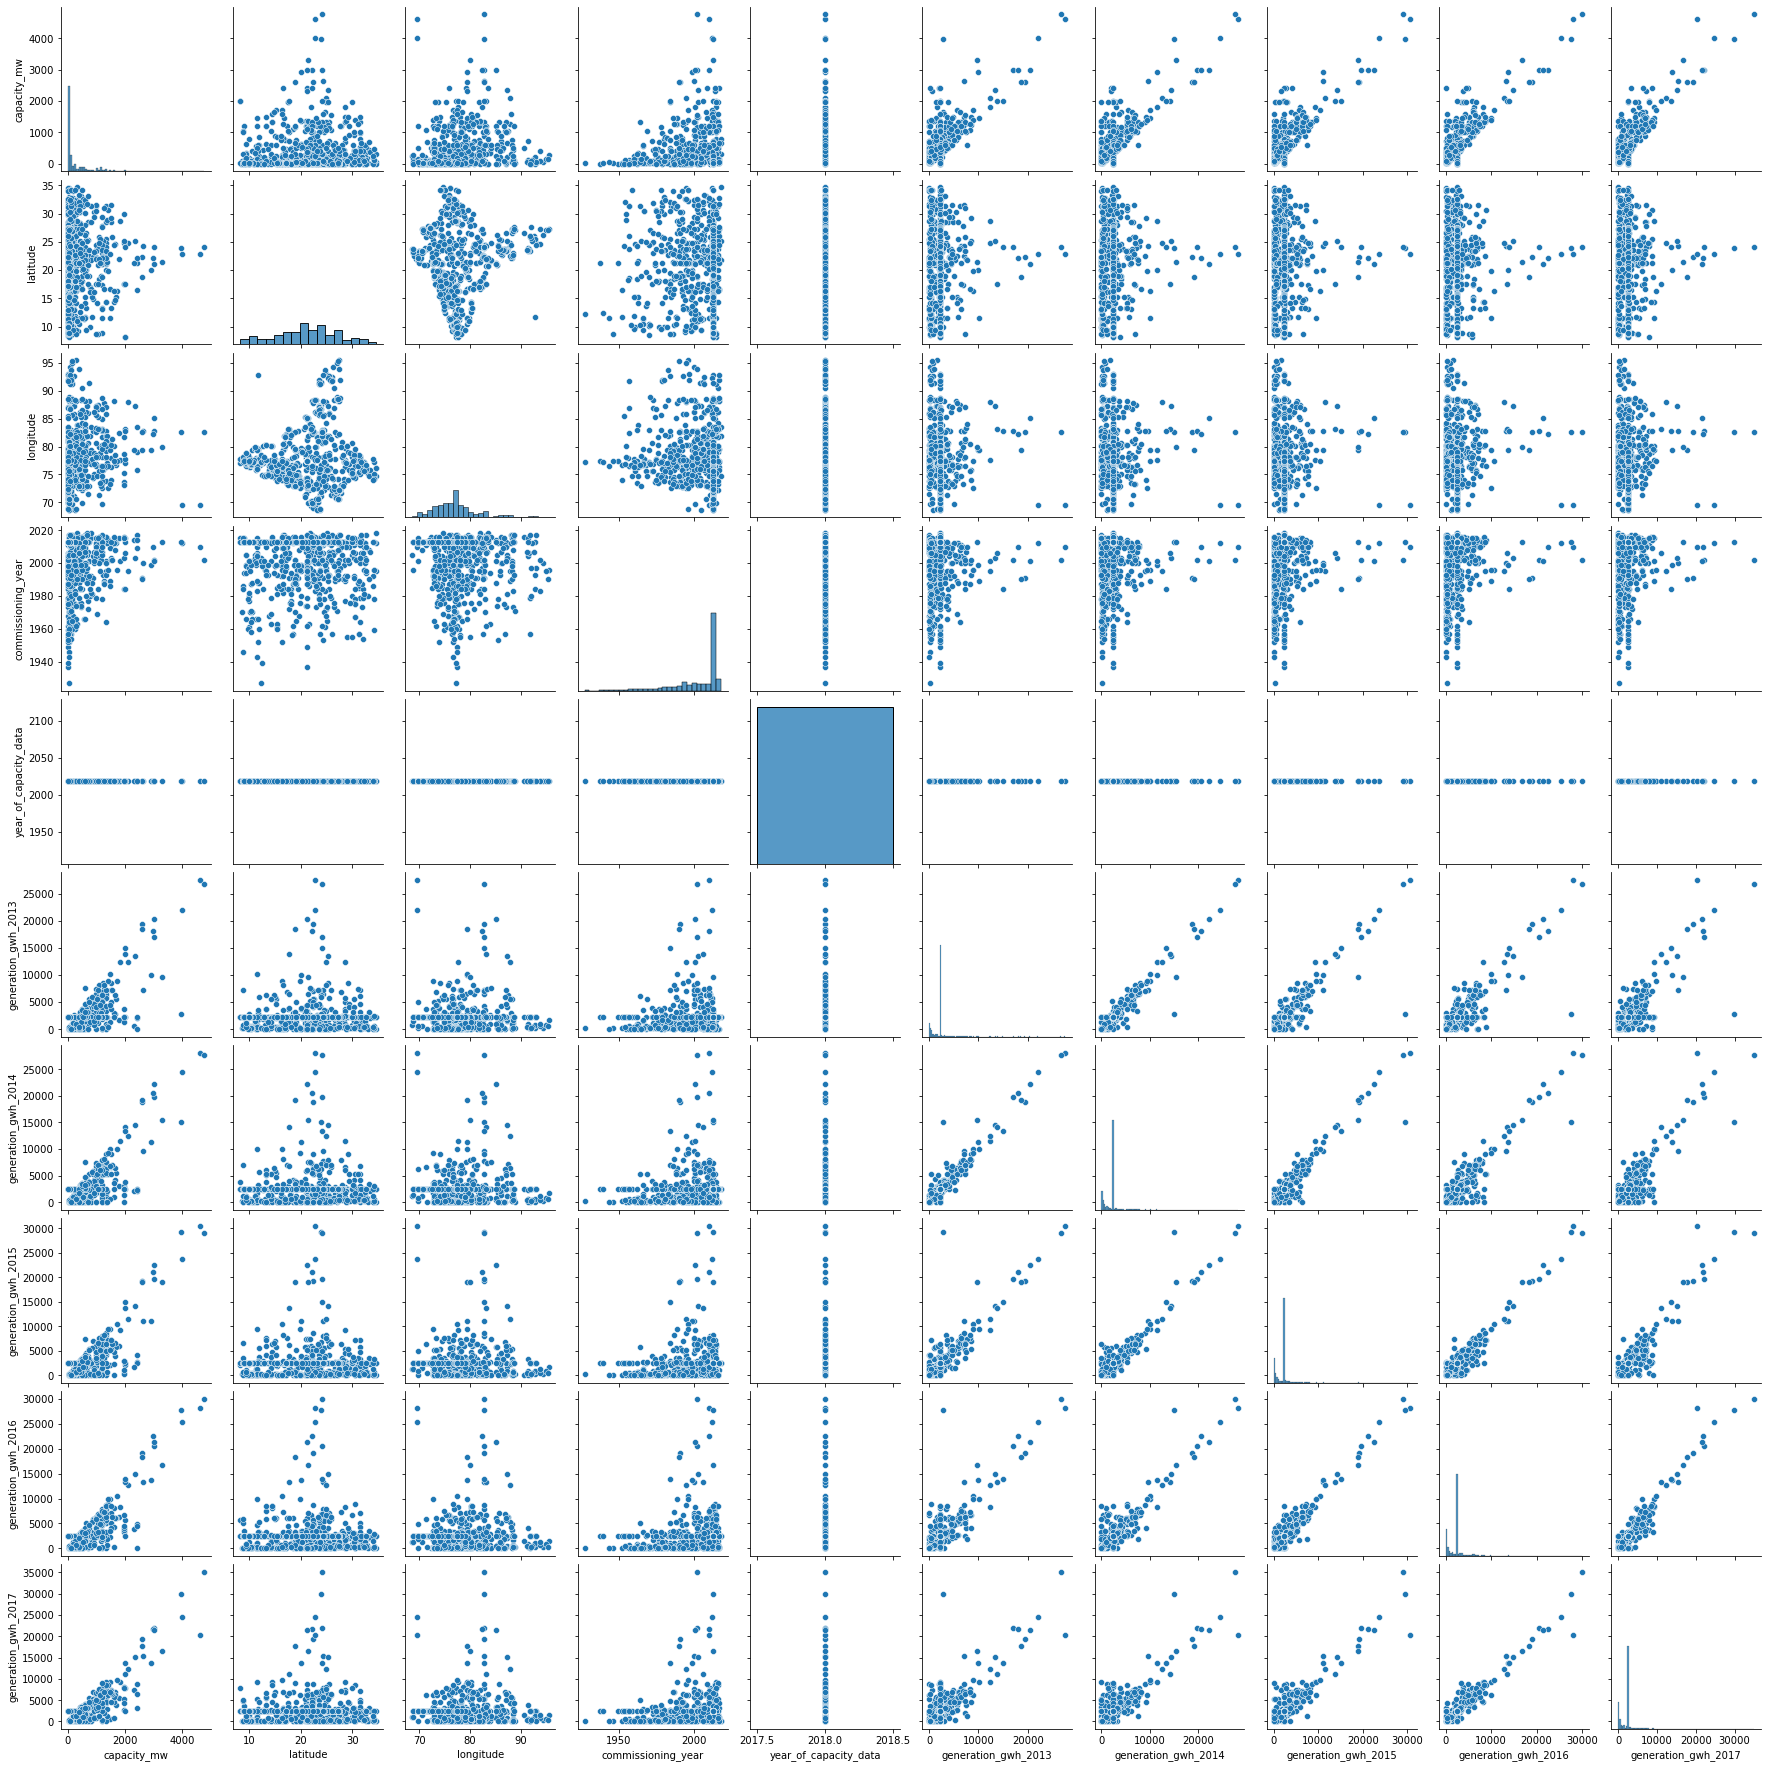

In [15]:
sns.pairplot(df)

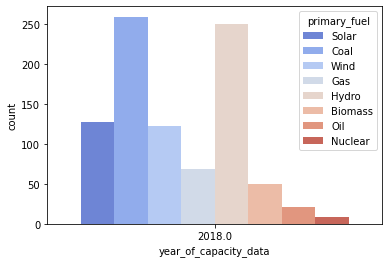

In [16]:
#countplot of diffrent condition
sns.countplot(df['year_of_capacity_data'], palette='coolwarm', hue='primary_fuel', data=df);

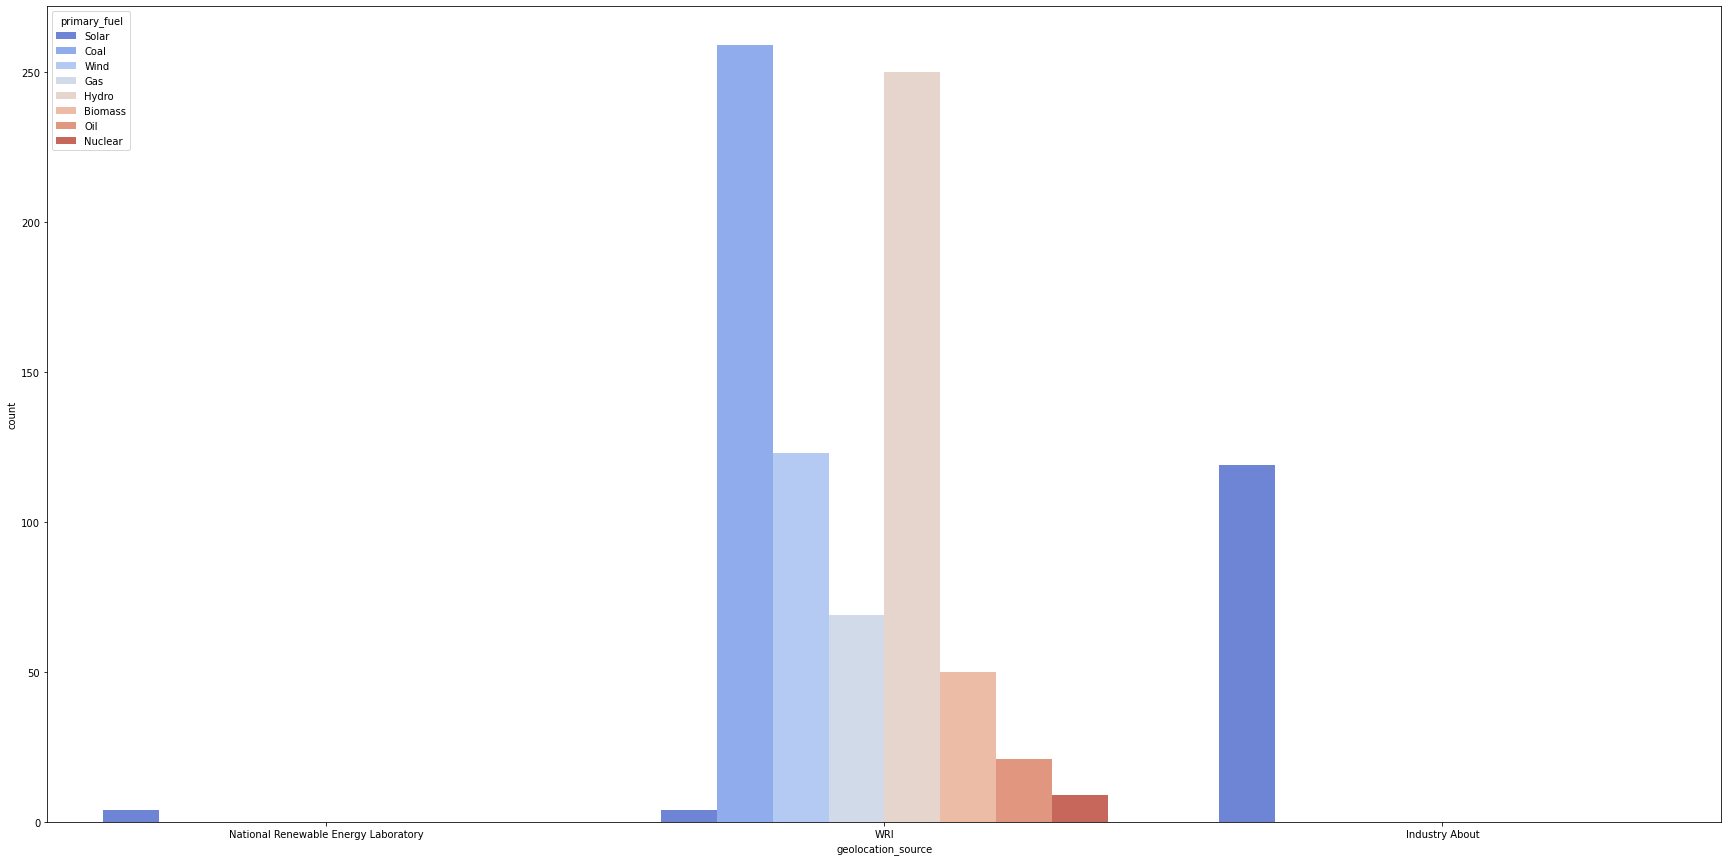

In [17]:
#countplot of diffrent condition
plt.figure(figsize=(30,15),facecolor="white")
sns.countplot(df['geolocation_source'], palette='coolwarm', hue='primary_fuel', data=df);

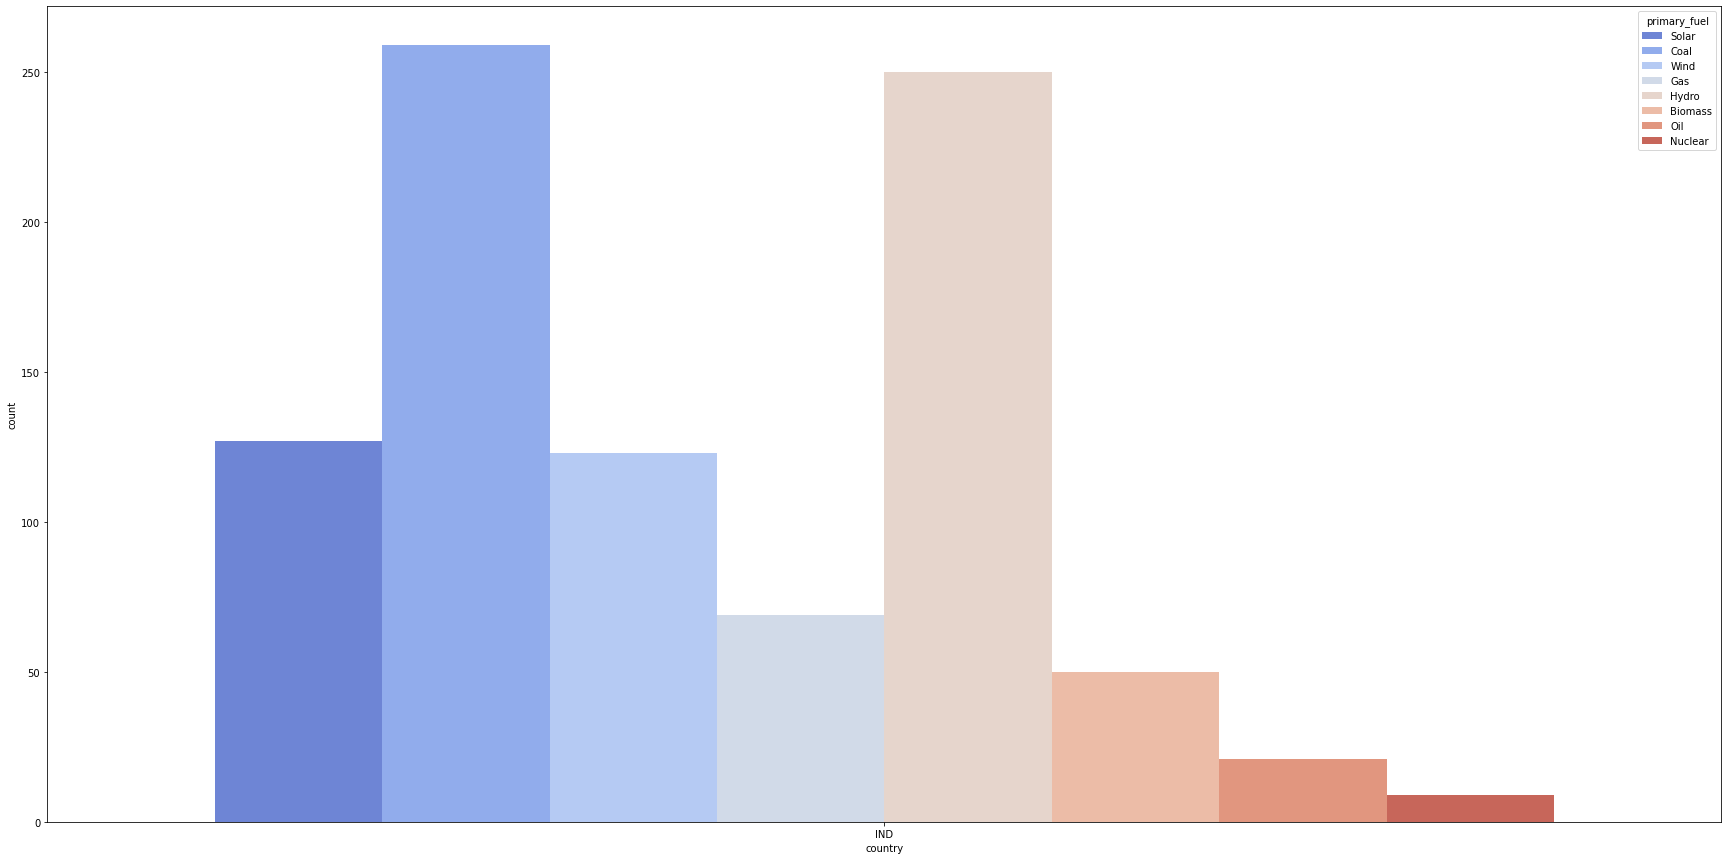

In [18]:
#countplot of diffrent condition
plt.figure(figsize=(30,15),facecolor="white")
sns.countplot(df['country'], palette='coolwarm', hue='primary_fuel', data=df);


In [19]:
#Looping my object coulmns and printing all my nunique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print()

country : 1
IND    908
Name: country, dtype: int64

country_long : 1
India    908
Name: country_long, dtype: int64

name : 908
Tata Wind Farm                       1
Shree Sangli Wind Farm               1
AES Saurashtra Windfarms             1
Dhank - Aravali Solar Power Plant    1
KALINADI                             1
                                    ..
Wind power project in Rajasthan      1
GODAVARI GT                          1
Shree Southern Wind Farm             1
KOPPAL HKMP                          1
BASSI                                1
Name: name, Length: 908, dtype: int64

gppd_idnr : 908
WRI1026342    1
WRI1026216    1
IND0000150    1
WRI1019933    1
IND0000035    1
             ..
WRI1026164    1
WRI1026189    1
IND0000489    1
IND0000407    1
IND0000422    1
Name: gppd_idnr, Length: 908, dtype: int64

primary_fuel : 8
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [20]:
#Looping my object coulmns and printing all my nunique values
for column in df.columns:
    if df[column].dtype == float or int:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print()

country : 1
IND    908
Name: country, dtype: int64

country_long : 1
India    908
Name: country_long, dtype: int64

name : 908
Tata Wind Farm                       1
Shree Sangli Wind Farm               1
AES Saurashtra Windfarms             1
Dhank - Aravali Solar Power Plant    1
KALINADI                             1
                                    ..
Wind power project in Rajasthan      1
GODAVARI GT                          1
Shree Southern Wind Farm             1
KOPPAL HKMP                          1
BASSI                                1
Name: name, Length: 908, dtype: int64

gppd_idnr : 908
WRI1026342    1
WRI1026216    1
IND0000150    1
WRI1019933    1
IND0000035    1
             ..
WRI1026164    1
WRI1026189    1
IND0000489    1
IND0000407    1
IND0000422    1
Name: gppd_idnr, Length: 908, dtype: int64

capacity_mw : 365
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
26.4       1
68.8       1
91.8       1
1.8        1
816.4      1
Name: ca

#### Dropping irrelated and nominal data

In [21]:
df.drop('country',axis=1,inplace=True,)
df.drop('country_long',axis=1,inplace=True)
df.drop('name',axis=1,inplace=True)

In [22]:
df.drop('gppd_idnr',axis=1,inplace=True)
df.drop('url',axis=1,inplace=True)
df.drop('generation_data_source',axis=1,inplace=True)

In [23]:
df.drop("year_of_capacity_data",axis=1,inplace=True)

In [24]:
#Looping my object coulmns and printing all my nunique values
for column in df.columns:
    if df[column].dtype == float or int or object:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print()

capacity_mw : 365
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
26.4       1
68.8       1
91.8       1
1.8        1
816.4      1
Name: capacity_mw, Length: 365, dtype: int64

latitude : 838
21.196189    46
24.191700     3
19.000400     3
24.874700     2
11.533600     2
             ..
9.087000      1
20.909900     1
17.238700     1
23.559400     1
16.597300     1
Name: latitude, Length: 838, dtype: int64

longitude : 829
77.447848    46
71.691700     4
75.898800     3
71.691800     3
72.898300     3
             ..
76.113700     1
74.644700     1
86.097000     1
77.610100     1
79.574800     1
Name: longitude, Length: 829, dtype: int64

primary_fuel : 8
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

commissioning_year : 73
2013.0    408
2015.0     26
2012.0     23
2016.0     21
2014.0     17
         ... 
1958.0      1
1949.0      1
1954.0      1
19

In [25]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['primary_fuel', 'owner', 'source', 'geolocation_source'], dtype='object')


In [26]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   commissioning_year   908 non-null    float64
 5   owner                908 non-null    int32  
 6   source               908 non-null    int32  
 7   geolocation_source   908 non-null    int32  
 8   generation_gwh_2013  908 non-null    float64
 9   generation_gwh_2014  908 non-null    float64
 10  generation_gwh_2015  908 non-null    float64
 11  generation_gwh_2016  908 non-null    float64
 12  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int32(4)
memory usage: 78.2 KB


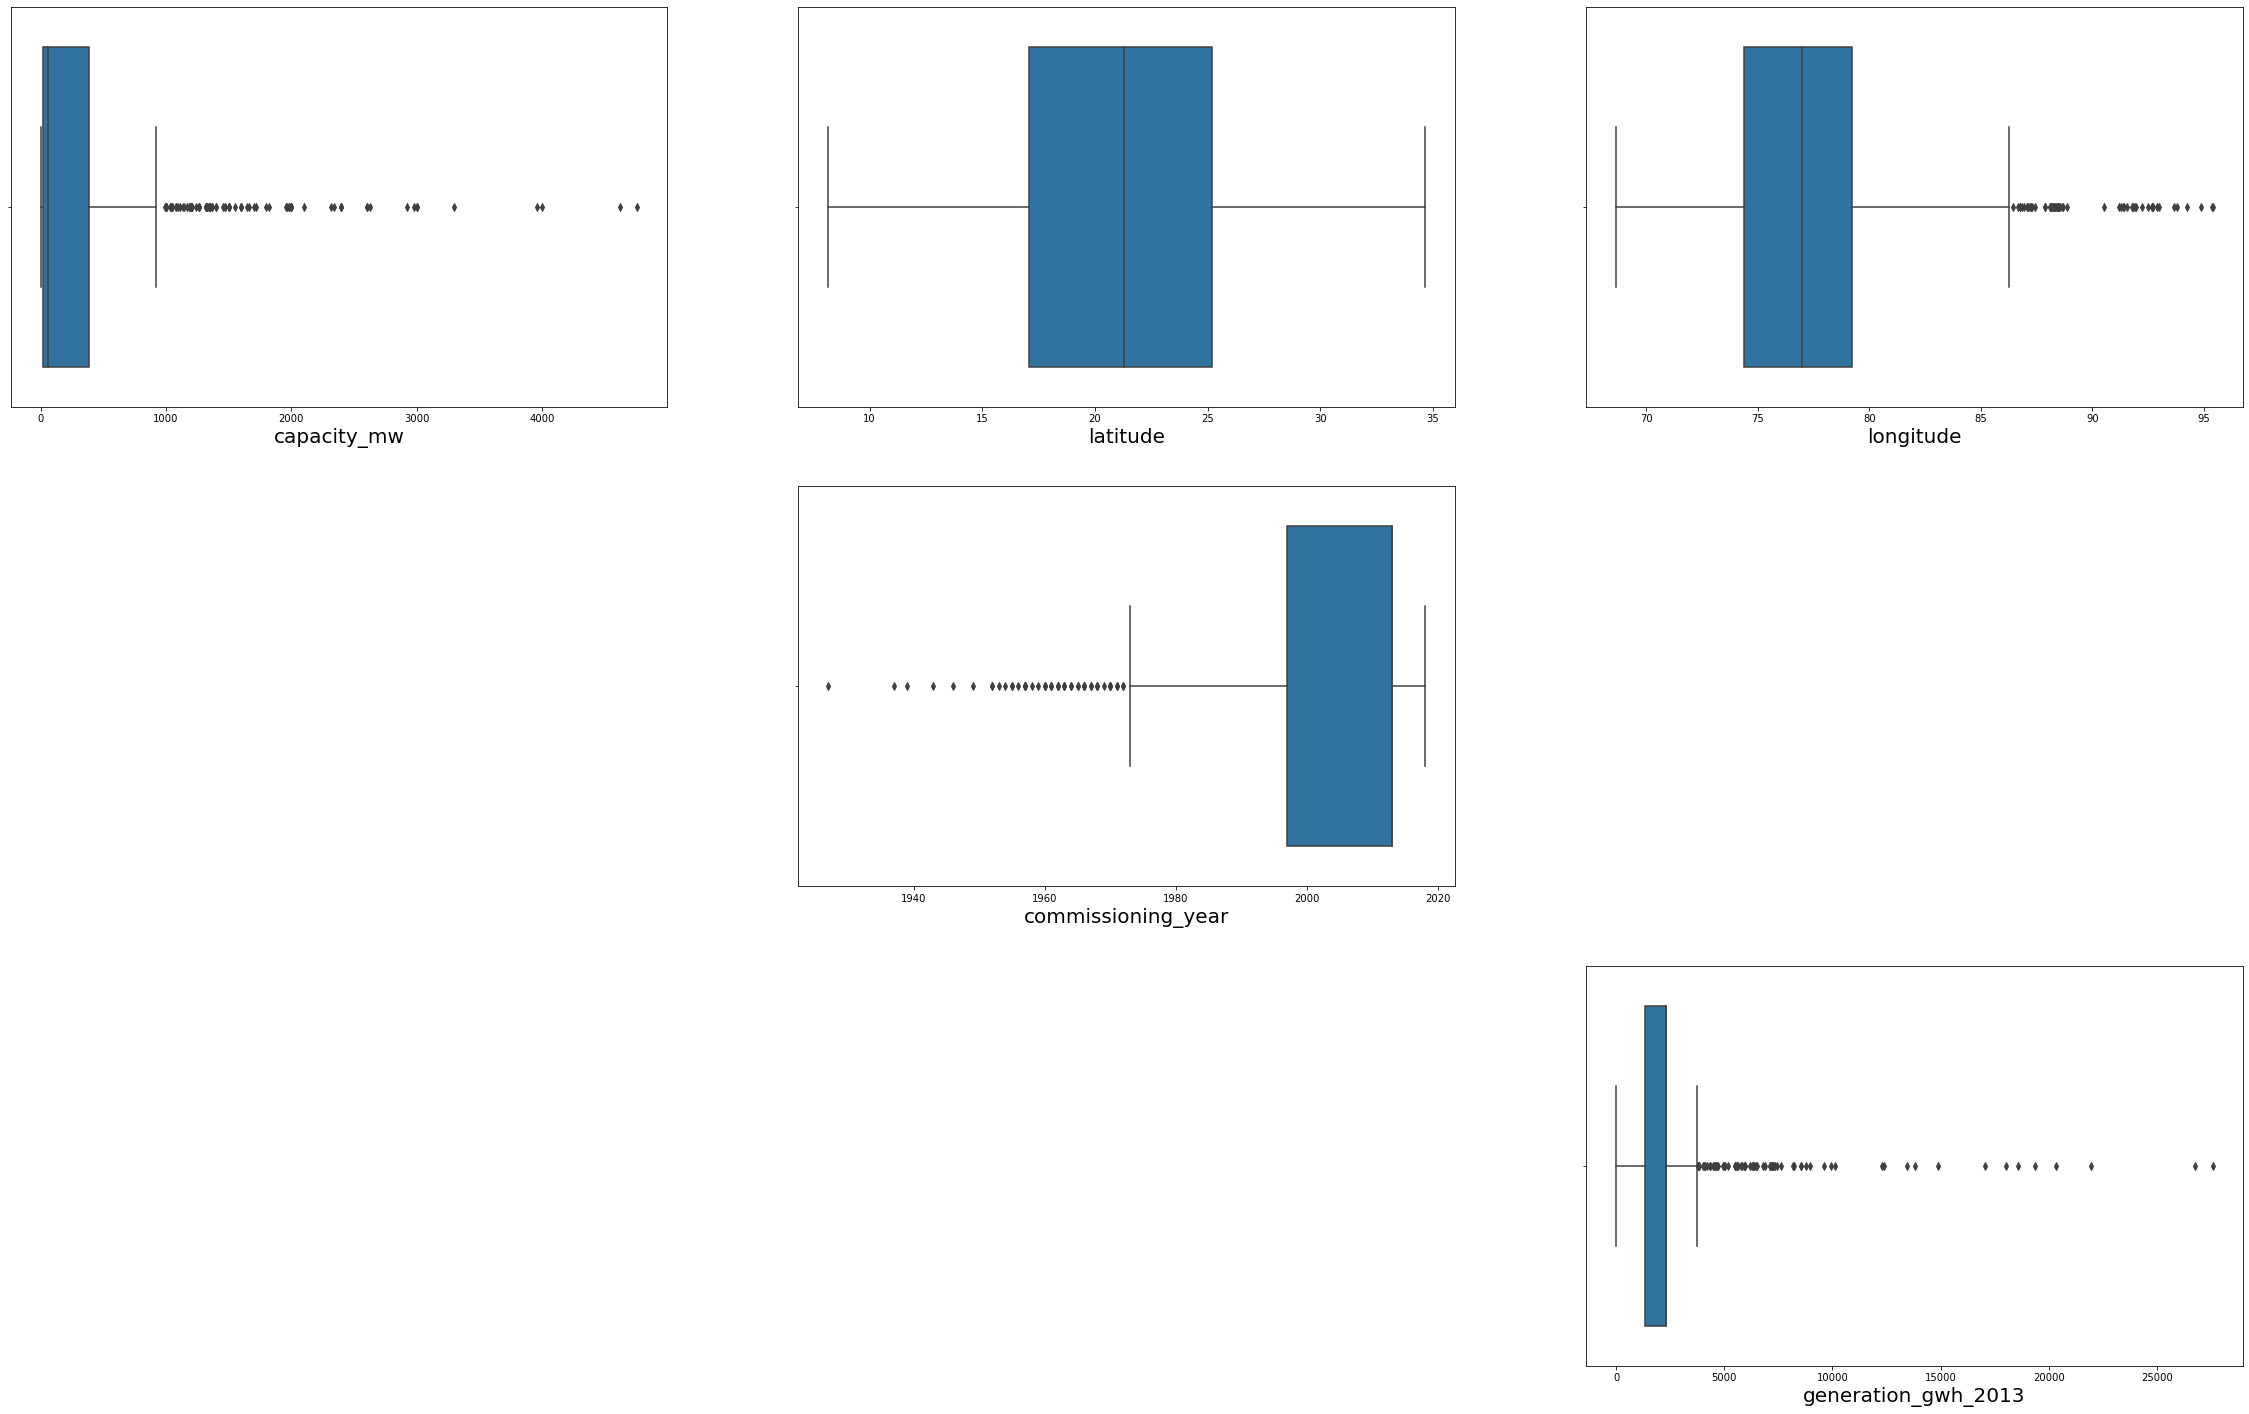

In [28]:
#plotting box plot for my dataframe removing outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [29]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df))
index = (np.where(z > 3)[0])

df = df.drop(df.index[index])

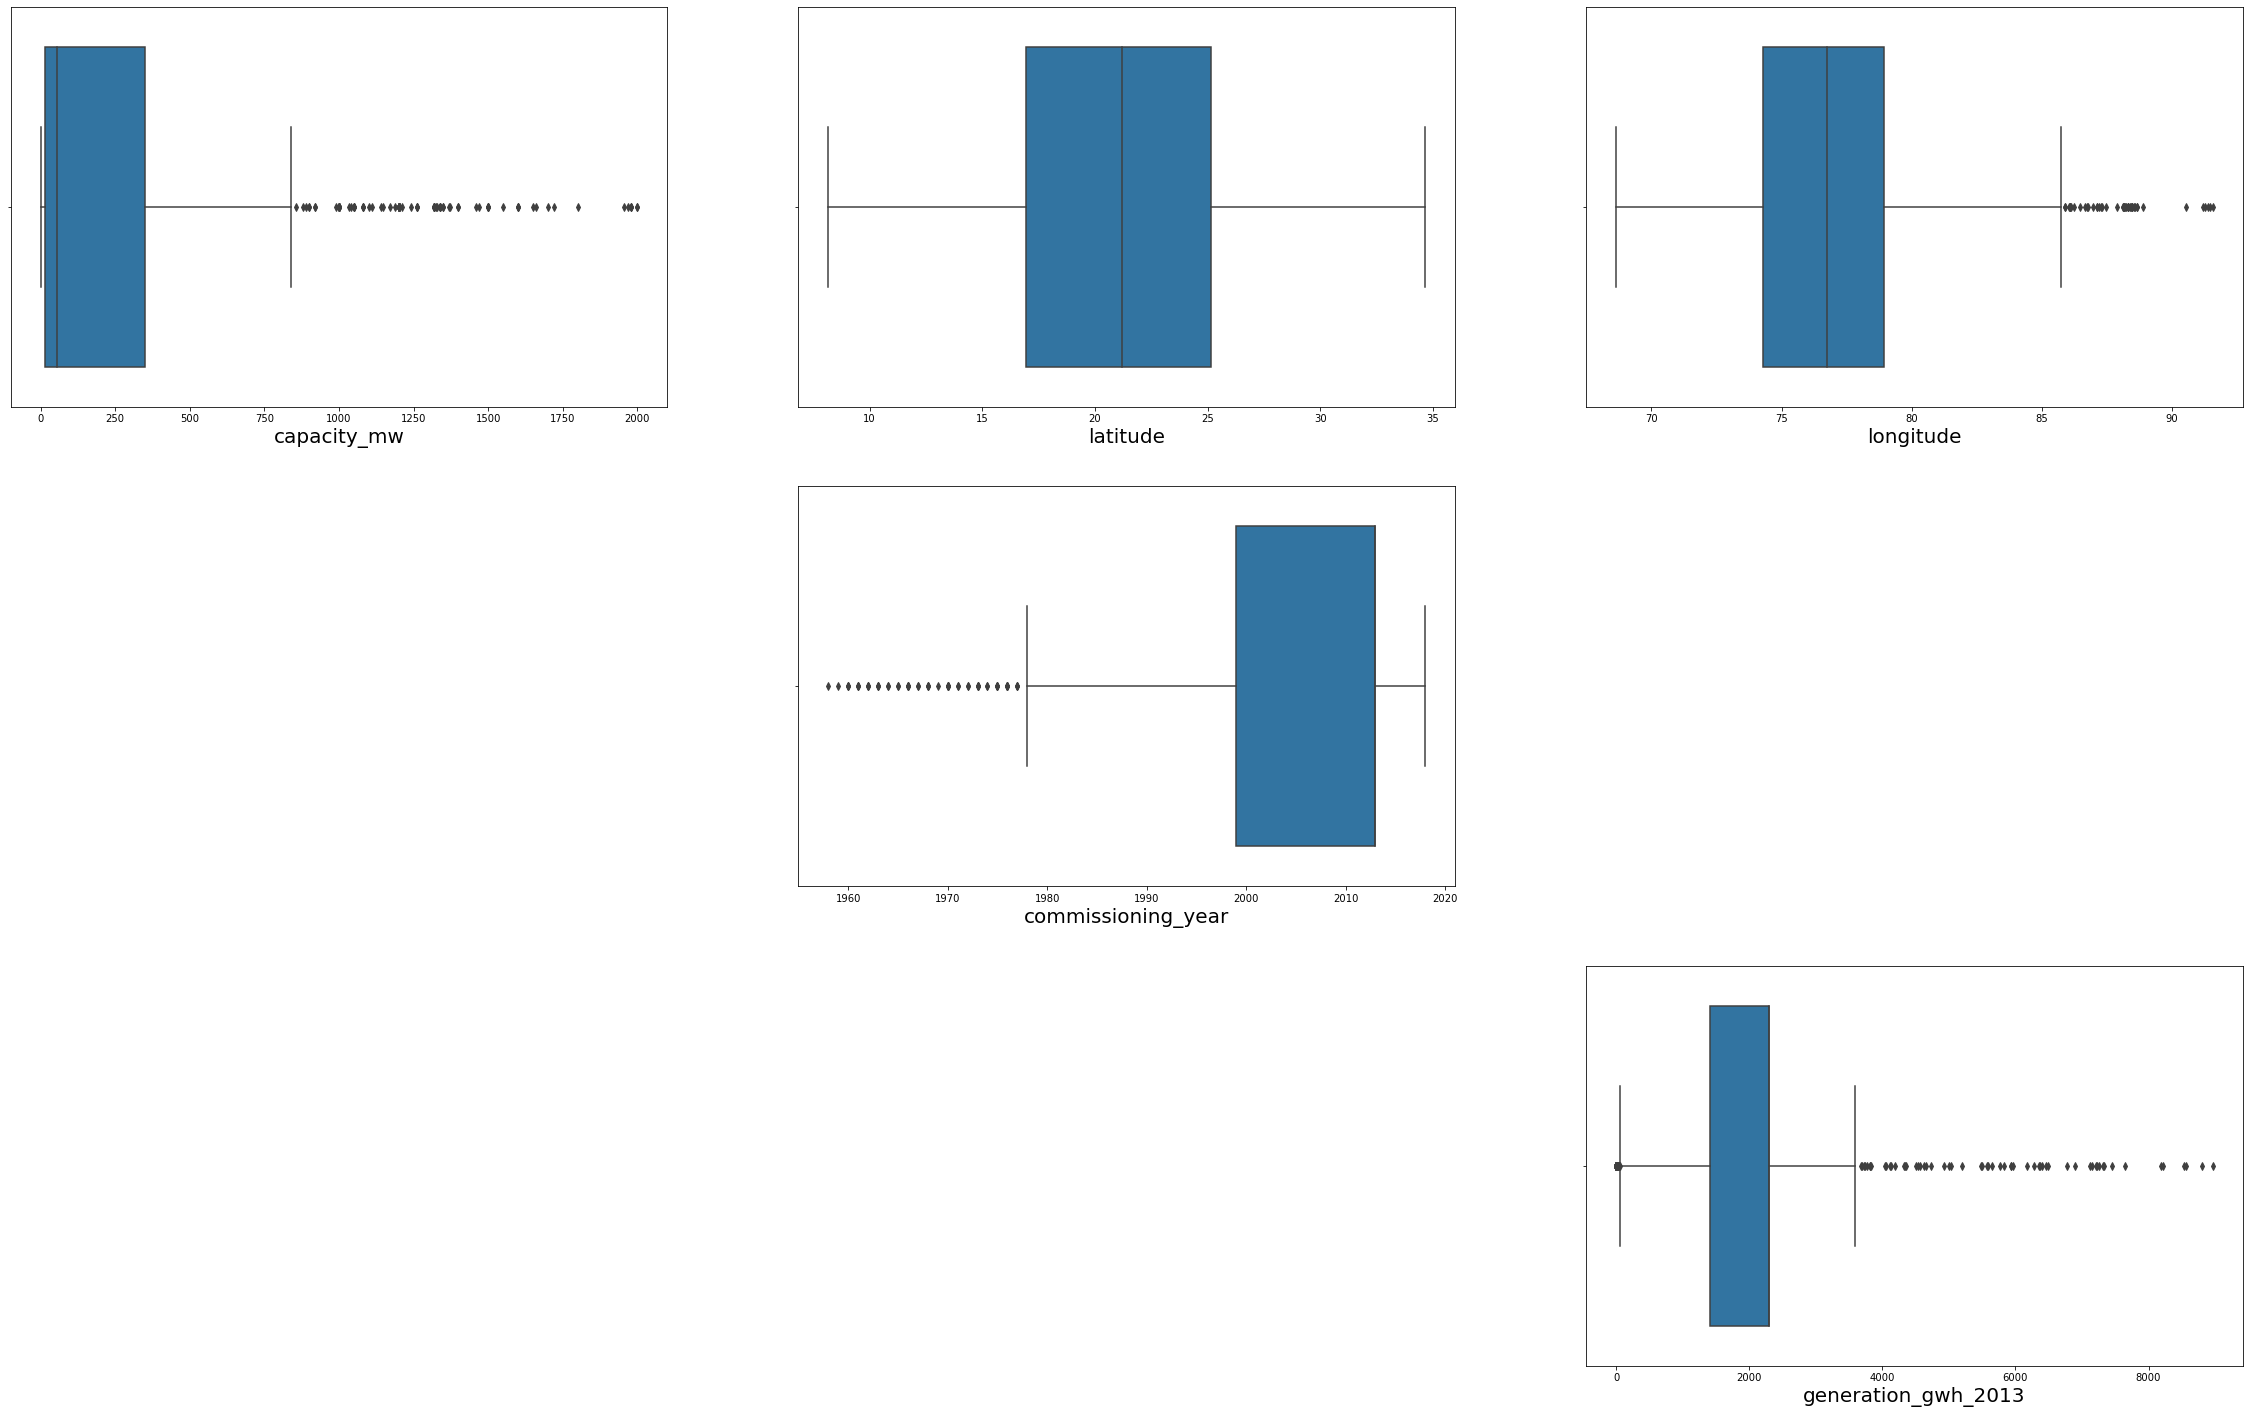

In [30]:
#plotting box plot for my dataframe removing outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

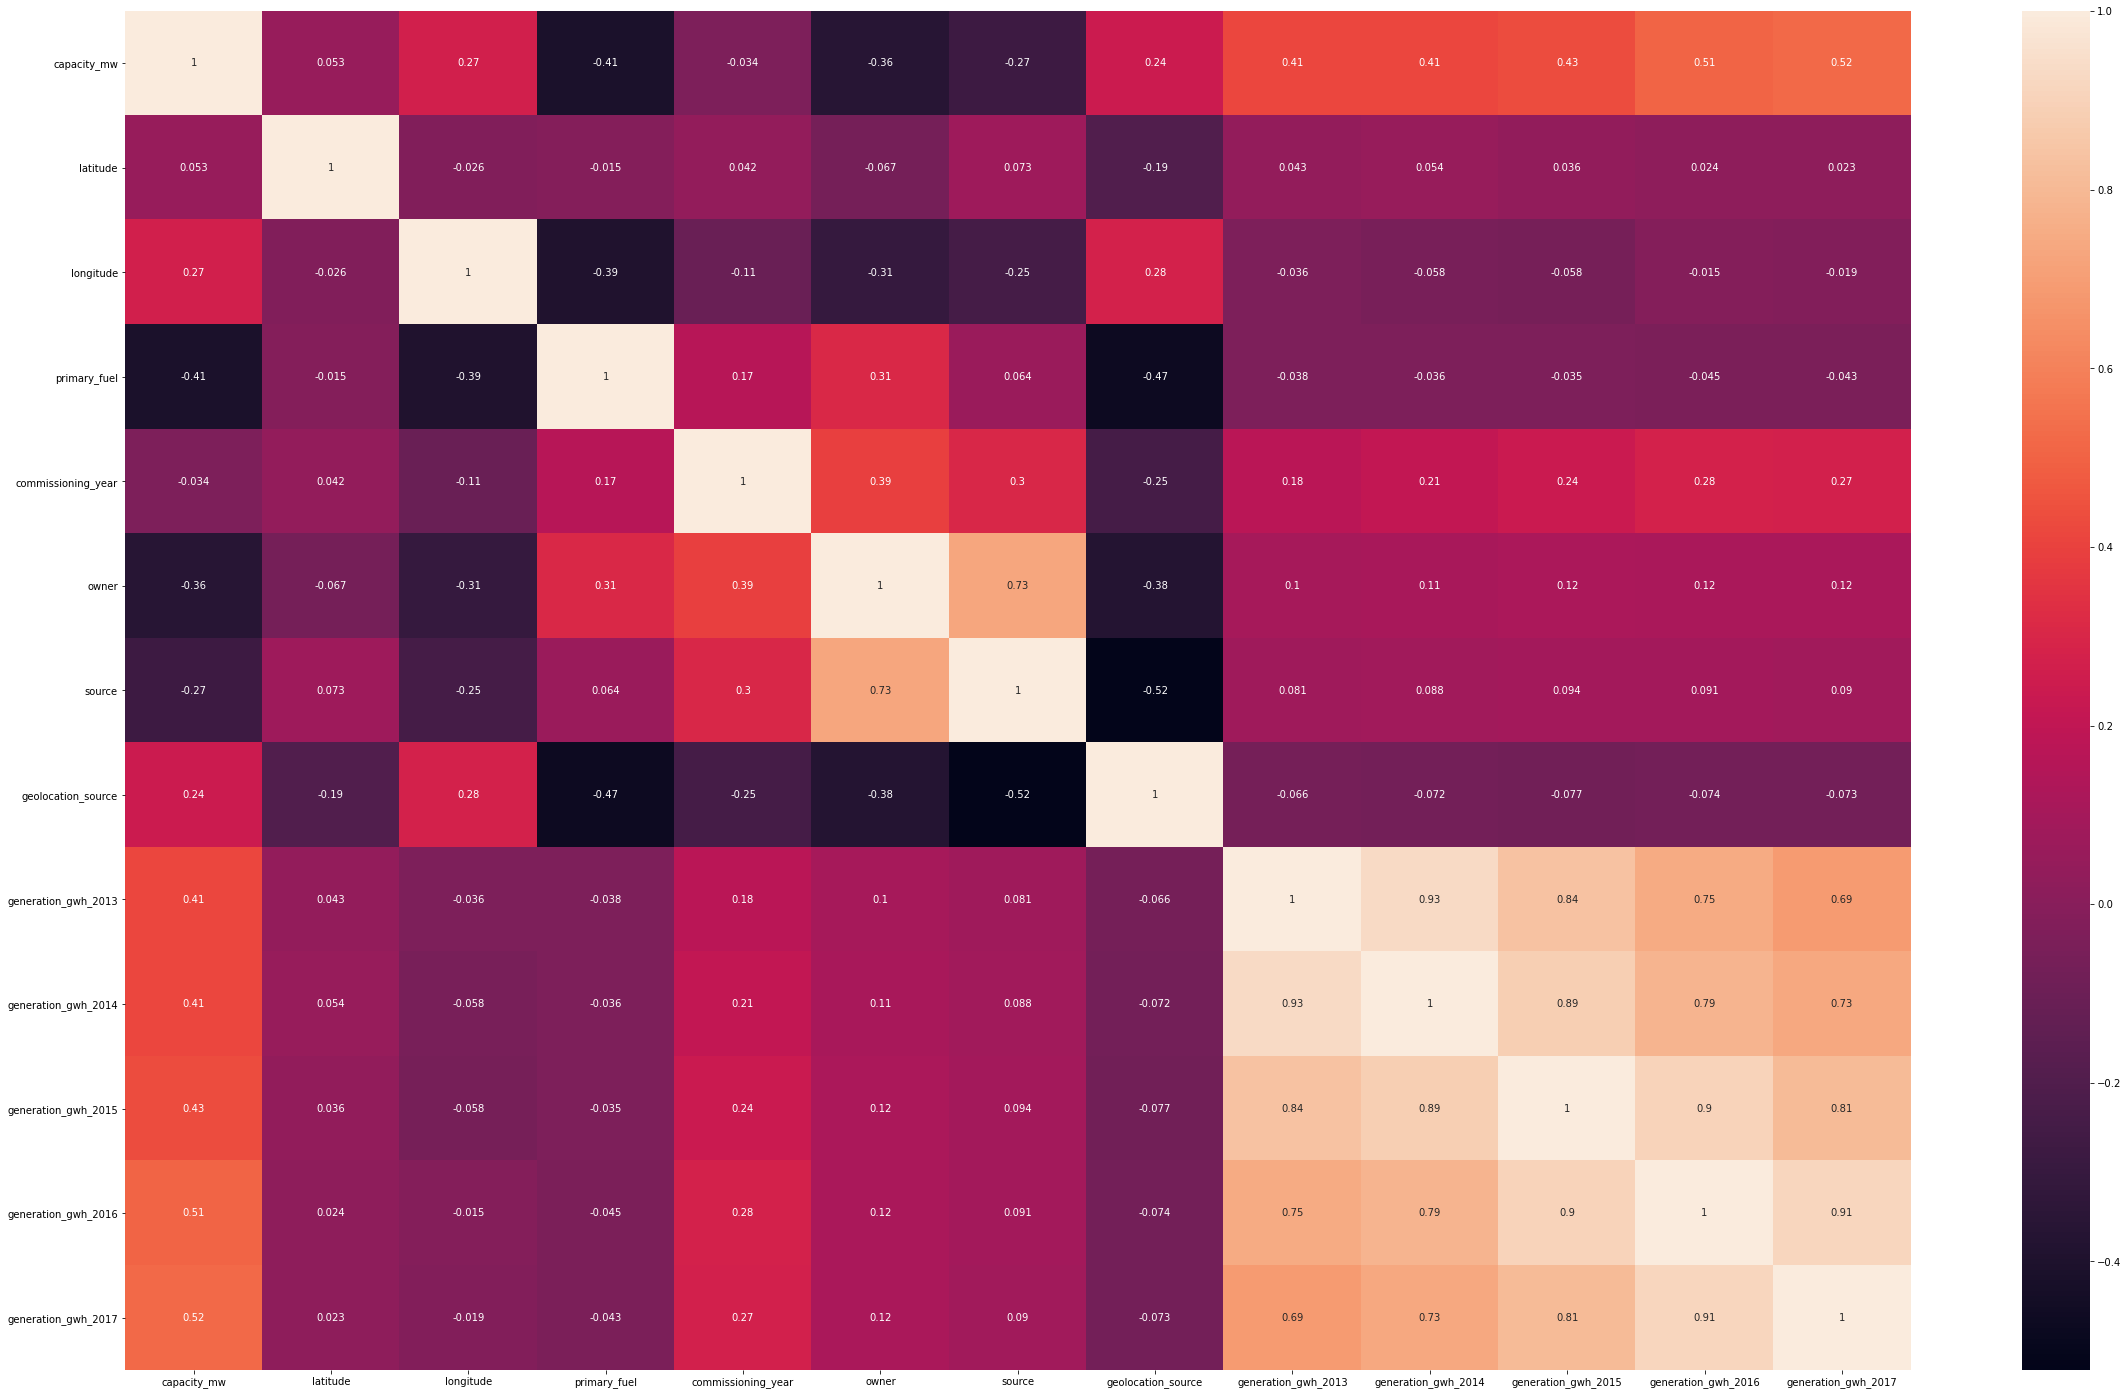

In [31]:
#correlation matrix
corr_mat = df.corr()

#heatmap for my corr_mat
#countplot
plt.figure(figsize=(40,25),facecolor="white")
sns.heatmap(corr_mat, annot=True);

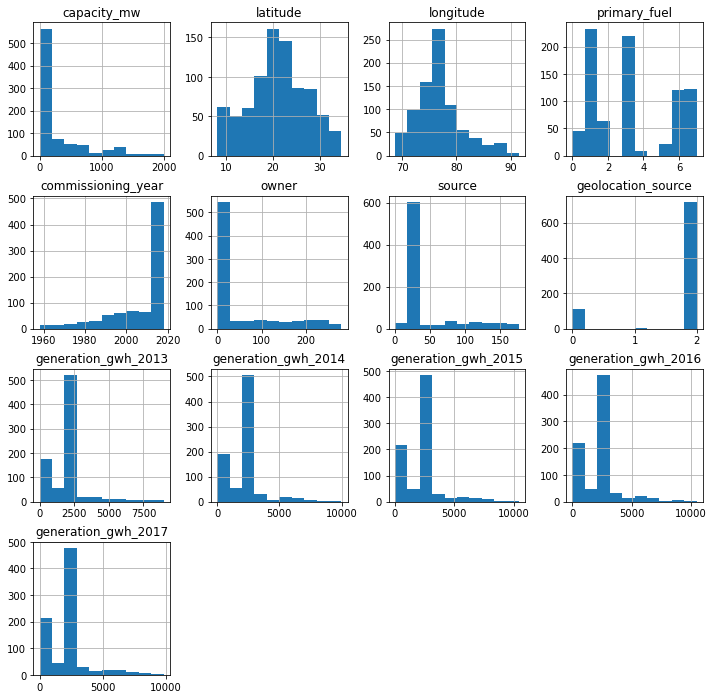

In [32]:
#histogram for my dataset
df.hist(figsize=(12,12), sharex=False);

In [36]:
#making a copy of our dataset ... one for predicting primary fuel and one for capcity_mw
dfp=df
dfc=df

# Predicting for primary fuel

In [37]:
#scaling mydata
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit_transform(dfp.drop('primary_fuel', axis=1))

In [38]:
#splitting mydataset
X= dfp.drop(['primary_fuel'], axis=1)
y = dfp['primary_fuel']

In [39]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = ss

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [40]:

vif

,VIF,Features
0,2.027884,capacity_mw
1,1.085636,latitude
2,1.195214,longitude
3,1.289717,commissioning_year
4,2.734165,owner
5,2.559252,source
6,1.524144,geolocation_source
7,7.591417,generation_gwh_2013
8,10.744419,generation_gwh_2014
9,9.605686,generation_gwh_2015


In [41]:
#splitting my data to train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ss, y, test_size=0.3, random_state=40)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [45]:
#builiding KNN classifier and metrics to be validate my KNN
from sklearn.neighbors import KNeighborsClassifier
# k=3
knn = KNeighborsClassifier(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(X_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test) #Predict 


print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predict)) #for confusion matrix
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predict)) #for classification report


Confusion Matrix
 [[12  2  0  0  0  0  0  0]
 [ 4 50  1  4  0  0  0  4]
 [ 0  3  9  2  0  0  0  0]
 [ 0  8  2 62  0  3  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 2  0  0  0  0  2  0  0]
 [ 1  0  0  0  0  0 43  0]
 [ 1  0  0  0  0  0  0 35]]
------------------------------
Accuracy of KNN :0.85
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.60      0.86      0.71        14
           1       0.79      0.79      0.79        63
           2       0.75      0.64      0.69        14
           3       0.90      0.83      0.86        75
           4       0.00      0.00      0.00         1
           5       0.40      0.50      0.44         4
           6       1.00      0.98      0.99        44
           7       0.90      0.97      0.93        36

    accuracy                           0.85       251
   macro avg       0.67      0.70      0.68       251
weighted avg       0.85      0.85      0.85       251



In [46]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for KNN
a =cross_val_score(knn,ss,y,cv=5).mean()
b = KNN_accuracy

b-a

0.04261755373714726

In [47]:
#Bulding SVC and metrics to be validated
from sklearn.svm import SVC
svc = SVC()  #Instantiate SVC
svc.fit(X_train,y_train) #Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test) #Predict 


print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc)) #for confusion matrix
print('-'*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc)) #for classification report


Confusion Matrix
 [[10  3  0  0  0  0  0  1]
 [ 1 50  0  8  0  0  0  4]
 [ 2  4  0  8  0  0  0  0]
 [ 0 11  0 64  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 2  0  0  2  0  0  0  0]
 [ 0  2  0  0  0  0 42  0]
 [ 0  1  0  0  0  0  0 35]]
------------------------------
Accuracy of SVC : 0.8007968127490039
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.70      0.79      0.75        63
           2       0.00      0.00      0.00        14
           3       0.77      0.85      0.81        75
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      0.95      0.98        44
           7       0.88      0.97      0.92        36

    accuracy                           0.80       251
   macro avg       0.50      0.54      0.52       251
weighted avg       0.75      0.80      0.77  

In [48]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for SVC
a =cross_val_score(svc,ss,y,cv=5).mean()
b = SVC_accuracy

b-a

0.03432974688074042

In [49]:
#Bulding RF and metrics to be validated
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()  #Instantiate RF
rf.fit(X_train,y_train) #Call the fit method of RF to train the model or to learn the parameters of model
predicted_rf = rf.predict(X_test) #Predict 


print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_rf)) #for confusion matrix
print('-'*30)
rf_accuracy = accuracy_score(y_test,predicted_rf) #for accuracy score
print('Accuracy of rf :',rf_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_rf)) #for classification report


Confusion Matrix
 [[12  2  0  0  0  0  0  0]
 [ 2 54  1  4  0  1  0  1]
 [ 0  5  3  4  0  2  0  0]
 [ 0 11  0 64  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  1  0  0  0  2  0  0]
 [ 1  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 36]]
------------------------------
Accuracy of rf : 0.852589641434263
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.73      0.86      0.79        63
           2       0.75      0.21      0.33        14
           3       0.89      0.85      0.87        75
           4       0.00      0.00      0.00         1
           5       0.40      0.50      0.44         4
           6       1.00      0.98      0.99        44
           7       0.97      1.00      0.99        36

    accuracy                           0.85       251
   macro avg       0.69      0.66      0.65       251
weighted avg       0.85      0.85      0.84    

In [50]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for RF
a =cross_val_score(rf,ss,y,cv=5).mean()
b = rf_accuracy

b-a

0.0058830546079158275

In [51]:
#Bulding AB and metrics to be validated
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()  #Instantiate AB
ab.fit(X_train,y_train) #Call the fit method of AB to train the model or to learn the parameters of model
predicted_ab = ab.predict(X_test) #Predict 


print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ab)) #for confusion matrix
print('-'*30)
ab_accuracy = accuracy_score(y_test,predicted_ab) #for accuracy score
print('Accuracy of ab :',ab_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ab)) #for classification report


Confusion Matrix
 [[ 0 14  0  0  0  0  0  0]
 [ 0 20  0 43  0  0  0  0]
 [ 0  2  0 12  0  0  0  0]
 [ 0  0  0 75  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  0  1  0  0 42  0]
 [22 14  0  0  0  0  0  0]]
------------------------------
Accuracy of ab : 0.545816733067729
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.38      0.32      0.34        63
           2       0.00      0.00      0.00        14
           3       0.56      1.00      0.72        75
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      0.95      0.98        44
           7       0.00      0.00      0.00        36

    accuracy                           0.55       251
   macro avg       0.24      0.28      0.25       251
weighted avg       0.44      0.55      0.47    

In [52]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for AB
a =cross_val_score(ab,ss,y,cv=5).mean()
b = ab_accuracy

b-a

0.03563709234916623

In [53]:
#Bulding DTC and metrics to be validated
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier()  #Instantiate DTC
ds.fit(X_train,y_train) #Call the fit method of DTC to train the model or to learn the parameters of model
predicted_ds = ds.predict(X_test) #Predict 


print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ds)) #for confusion matrix
print('-'*30)
ds_accuracy = accuracy_score(y_test,predicted_ds)#for accuracy score
print('Accuracy of ds :',ds_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ds)) #for classification report


Confusion Matrix
 [[13  1  0  0  0  0  0  0]
 [ 3 50  3  5  0  2  0  0]
 [ 0  2  7  4  0  1  0  0]
 [ 0  8  5 62  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  3  0  0  1  0  0]
 [ 0  1  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 36]]
------------------------------
Accuracy of ds : 0.848605577689243
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.81      0.79      0.80        63
           2       0.39      0.50      0.44        14
           3       0.87      0.83      0.85        75
           4       1.00      1.00      1.00         1
           5       0.25      0.25      0.25         4
           6       1.00      0.98      0.99        44
           7       1.00      1.00      1.00        36

    accuracy                           0.85       251
   macro avg       0.77      0.78      0.77       251
weighted avg       0.86      0.85      0.85    

In [54]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for DTC
a =cross_val_score(ds,ss,y,cv=5).mean()
b = ds_accuracy

b-a

0.05219839206050059

In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [58]:
#Bulding RF and metrics to be validated
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=400,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap='False')  #Instantiate RF
rf1.fit(X_train,y_train) #Call the fit method of RF to train the model or to learn the parameters of model
predicted_rf1 = rf1.predict(X_test) #Predict 


print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_rf1)) #for confusion matrix
print('-'*30)
rf_accuracy1 = accuracy_score(y_test,predicted_rf1) #for accuracy score
print('Accuracy of rf :',rf_accuracy1)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_rf1)) #for classification report


Confusion Matrix
 [[12  2  0  0  0  0  0  0]
 [ 3 53  0  5  0  0  0  2]
 [ 0  5  2  6  0  1  0  0]
 [ 0 11  0 64  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  1  0  1  0  1  0  0]
 [ 0  2  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 36]]
------------------------------
Accuracy of rf : 0.8366533864541833
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.71      0.84      0.77        63
           2       1.00      0.14      0.25        14
           3       0.84      0.85      0.85        75
           4       0.00      0.00      0.00         1
           5       0.50      0.25      0.33         4
           6       1.00      0.95      0.98        44
           7       0.95      1.00      0.97        36

    accuracy                           0.84       251
   macro avg       0.72      0.61      0.62       251
weighted avg       0.85      0.84      0.82   

In [60]:
#Saving the model in pkl file
import joblib
joblib.dump(rf,"global_primary.pkl")

model = joblib.load("global_primary.pkl")

#Predicting the saved model
prediction =rf1.predict(X_test)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("global_primary.csv",index=False)

# Predicting for capacity_mw

In [61]:
#scaling mydata
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit_transform(dfc.drop('capacity_mw', axis=1))

In [62]:
#splitting mydataset
X= dfc.drop(['capacity_mw'], axis=1)
y = dfc['capacity_mw']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [64]:
from xgboost import XGBRegressor
xgb = XGBRegressor()  
xgb.fit(x_train,y_train) #Call the fit method of XGB to train the model or to learn the parameters of model
y_predict = xgb.predict(x_test) #Predict

In [65]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_predict))
r2_xgb = r2_score(y_test, y_predict)

In [66]:
print("The root mean Sq error calculated from the base model is:",rmse_xgb)
print("The r2-score is:",r2_xgb)

The root mean Sq error calculated from the base model is: 194.82483843972042
The r2-score is: 0.7950733330585475


In [67]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for xgb
a =cross_val_score(xgb,ss,y,cv=5).mean()
b = r2_xgb

b-a

0.04521132473746037

In [68]:
from sklearn.neighbors import KNeighborsRegressor  # k=3
knn = KNeighborsRegressor(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(x_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(x_test) #Predict

In [69]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

In [70]:
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 213.85646553536193
The r2-score is: 0.7530809504385951


In [71]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for knn
a =cross_val_score(knn,ss,y,cv=5).mean()
b = r2

b-a

0.051506869012667544

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train , y_train)
pred = lr.predict(x_test)

In [73]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_test, pred))
r2_1 = r2_score(y_test, pred)

In [74]:
print("The root mean Sq error calculated from the base model is:",rmse1)
print("The r2-score is:",r2_1)

The root mean Sq error calculated from the base model is: 302.62874868995215
The r2-score is: 0.5055411081769189


In [75]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for lr
a =cross_val_score(lr,ss,y,cv=5).mean()
b = r2_1

b-a

-0.0011245290784962503

In [76]:
# using Decision tree regressor to my dataset
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor() #Instantiate the Desiciontree  object
DT.fit(x_train,y_train) #Call the fit method of DT to train the model or to learn the parameters of model
y_pred = DT.predict(x_test) #Predict

In [77]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_2 = r2_score(y_test, y_pred)

In [78]:
print("The root mean Sq error calculated from the base model is:",rmse2)
print("The r2-score is:",r2_2)

The root mean Sq error calculated from the base model is: 252.6399335573501
The r2-score is: 0.6554011499640937


In [79]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for DT
a =cross_val_score(DT,ss,y,cv=5).mean()
b = r2_2

b-a

0.08459681890015447

In [80]:
#Building SVR Model
from sklearn.svm import SVR
svr = SVR() #Instantiate the SVR object
svr.fit(x_train,y_train) #Call the fit method of SVR to train the model or to learn the parameters of model
y_pred = svr.predict(x_test) #Predict

In [81]:
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_3 = r2_score(y_test, y_pred)

In [82]:
print("The root mean Sq error calculated from the base model is:",rmse3)
print("The r2-score is:",r2_3)

The root mean Sq error calculated from the base model is: 467.99340384473527
The r2-score is: -0.18246771172837883


In [83]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() #Instantiate the RF object
rf.fit(x_train,y_train) #Call the fit method of RF to train the model or to learn the parameters of model
y_pred = rf.predict(x_test) #Predict

In [84]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_4 = r2_score(y_test, y_pred)

In [85]:
print("The root mean Sq error calculated from the base model is:",rmse4)
print("The r2-score is:",r2_4)

The root mean Sq error calculated from the base model is: 184.04111117628003
The r2-score is: 0.8171312398559347


In [86]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for RF
a =cross_val_score(rf,ss,y,cv=5).mean()
b = r2_4

b-a

0.04333283579623348

#### Hyperparameter tuning

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [88]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [89]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [90]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [91]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 64}

In [92]:
rf_Grid.best_score_

0.7657012688072133

In [93]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=56,bootstrap=True,max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=5) #Instantiate the LogisticRegression object
rf1.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = rf1.predict(x_test)

In [94]:
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_5 = r2_score(y_test, y_pred)

In [95]:

print("The root mean Sq error calculated from the base model is:",rmse5)
print("The r2-score is:",r2_5)

The root mean Sq error calculated from the base model is: 202.75498779699203
The r2-score is: 0.7780511391514818


In [96]:

#Saving the model in pkl file
import joblib
joblib.dump(rf,"capacity_mw.pkl")

model = joblib.load("capacity_mw.pkl")

#Predicting the saved model
prediction = model.predict(x_test)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("capacity_mw",index=True)